# Thực hiện đọc dữ liệu từ hdfs

Dữ liệu đã được lưu trữ trên hdfs, hiện tại ta cần sử dụng pyspark để đọc dữ liệu ra và xử lý. Cụm spark đã được bật, ta có thể xem thông tin của cả cụm trên web ui host post của spark-master là 0.0.0.0:8080 (truy cập qua localhost) hoặc 172.19.0.2:8080 (truy cập qua ip của container trong docker, xem thông tin bằng lệnh docker network inspect).

In [1]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from IPython.display import Image
import matplotlib.pyplot as plt


In [2]:
#Truy cập vào master của cụm tại địa chỉ 172.19.0.4:7077 với tên chương trình là Stock_price_analysis
spark = SparkSession.builder.master("spark://spark-master:7077").appName("Stock_price_analysis").getOrCreate()

Ta có thể  truy cập vào địa chỉ web ui của spark-master để xem thông tin của chương trình đang chạy

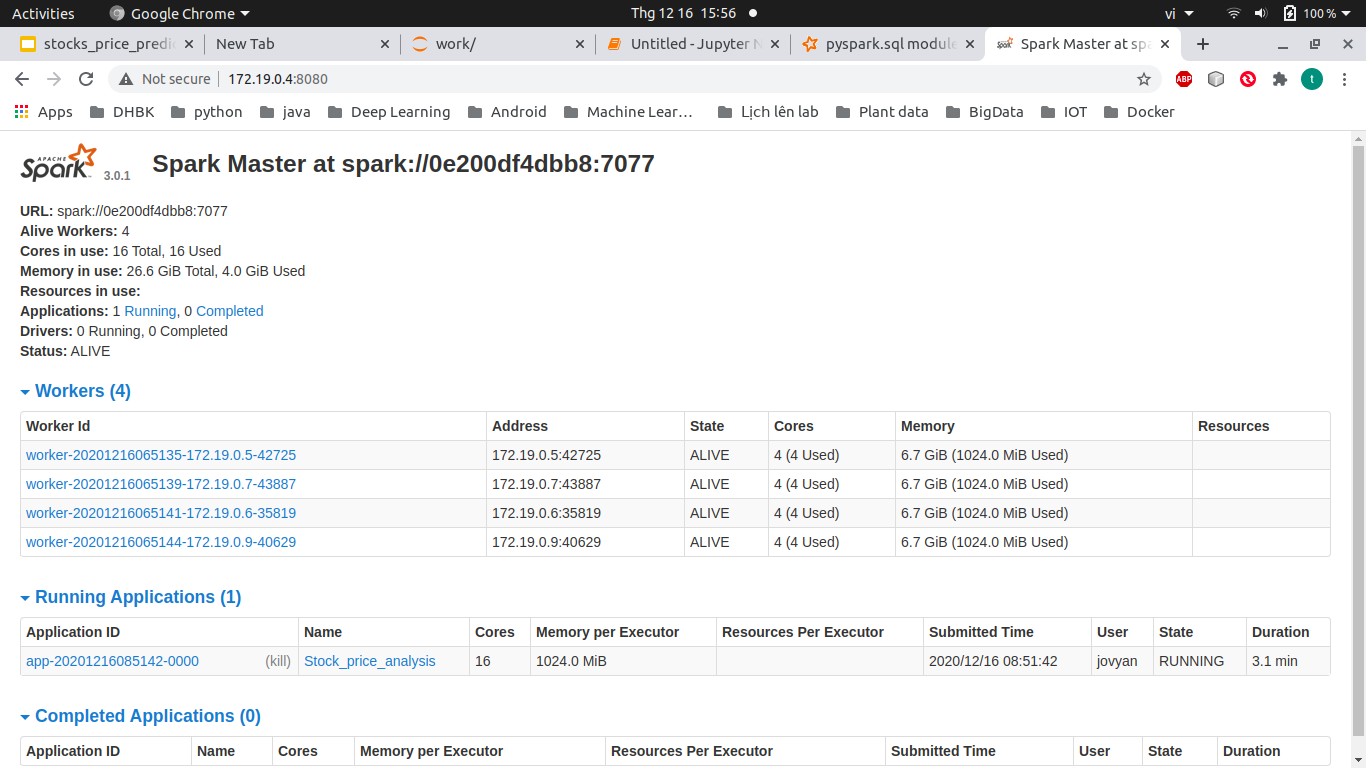

In [3]:
Image("spark_app.png")

Tiếp theo ta sẽ sử dụng spark session vừa tạo để truy cập vào hdfs và lấy dữ liệu ra để xử lý. Cụ thể ta sẽ truy cập vào địa chỉ của namenode trên hdfs là namenode:9000 

# Một số phân tích cơ bản

Ta lấy dữ liệu dataframe từ spark như thông thường.

Ở đây ta so sánh dữ liệu chứng khoán của 5 công ty lớn:

#### Facebook (mã FB)

#### Alibaba (mã BABA)

#### Apple (mã AAPL)

#### Cloudflare (mã NET)

#### Zoom meeting (mã ZM)


In [4]:


# df_FB = spark.read.format("csv").option("header", "true")\
# .option("inferSchema", "true").load("hdfs://namenode:9000/user/root/datack/stock_market_data-FB_2020-12-16.csv")

# df_BABA = spark.read.format("csv").option("header", "true")\
# .option("inferSchema", "true").load("hdfs://namenode:9000/user/root/datack/stock_market_data-BABA_2020-12-15.csv")

# df_AAPL = spark.read.format("csv").option("header", "true")\
# .option("inferSchema", "true").load("hdfs://namenode:9000/user/root/datack/stock_market_data-AAPL_2020-12-16.csv")

# df_NET = spark.read.format("csv").option("header", "true")\
# .option("inferSchema", "true").load("hdfs://namenode:9000/user/root/datack/stock_market_data-NET_2020-12-16.csv")

# df_ZM = spark.read.format("csv").option("header", "true")\
# .option("inferSchema", "true").load("hdfs://namenode:9000/user/root/datack/stock_market_data-ZM_2020-12-16.csv")


df_VIC = spark.read.format("csv").option("header", "true")\
.option("inferSchema", "true").load("hdfs://namenode:9000/user/root/datack_VN/stock_data_VIC.csv")

df_VCB = spark.read.format("csv").option("header", "true")\
.option("inferSchema", "true").load("hdfs://namenode:9000/user/root/datack_VN/stock_data_VCB.csv")

df_FPT = spark.read.format("csv").option("header", "true")\
.option("inferSchema", "true").load("hdfs://namenode:9000/user/root/datack_VN/stock_data_FPT.csv")

df_BID = spark.read.format("csv").option("header", "true")\
.option("inferSchema", "true").load("hdfs://namenode:9000/user/root/datack_VN/stock_data_BID.csv")

df_VPB = spark.read.format("csv").option("header", "true")\
.option("inferSchema", "true").load("hdfs://namenode:9000/user/root/datack_VN/stock_data_VPB.csv")


Sau khi lấy dữ liệu, ta thực hiện việc thêm cột Mean để tìm trung bình của mã chứng khoán trong ngày.

Từ đó ta vẽ được biểu đồ để so sánh các mã chứng khoán.

In [5]:
from pyspark.sql.functions import year, expr

df_VICmean = df_VIC.withColumn("Mean", expr('(high+low)/2')).filter(year("time") > 2012)
df_VCBmean = df_VCB.withColumn("Mean", expr('(high+low)/2')).filter(year("time") > 2012)
df_FPTmean = df_FPT.withColumn("Mean", expr('(high+low)/2')).filter(year("time") > 2012)
df_BIDmean = df_BID.withColumn("Mean", expr('(high+low)/2')).filter(year("time") > 2012)
df_VPBmean = df_VPB.withColumn("Mean", expr('(high+low)/2')).filter(year("time") > 2012)

Để dễ sử dụng thư viện đồ thị matplotlib, ta chuyển các dữ liệu dataframes về dạng pandas.

In [6]:
df_VICmean = df_VICmean.toPandas()
df_VCBmean = df_VCBmean.toPandas()
df_FPTmean = df_FPTmean.toPandas()
df_BIDmean = df_BIDmean.toPandas()
df_VPBmean = df_VPBmean.toPandas()

/usr/local/spark/python/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/usr/local/spark/python/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/usr/local/spark/python/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/usr/local/spark/python/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/usr/local/spark/python/pysp

Kết quả so sánh chỉ số trung bình trong ngày của các mã nói trên trong đồ thị

<AxesSubplot: xlabel='time'>

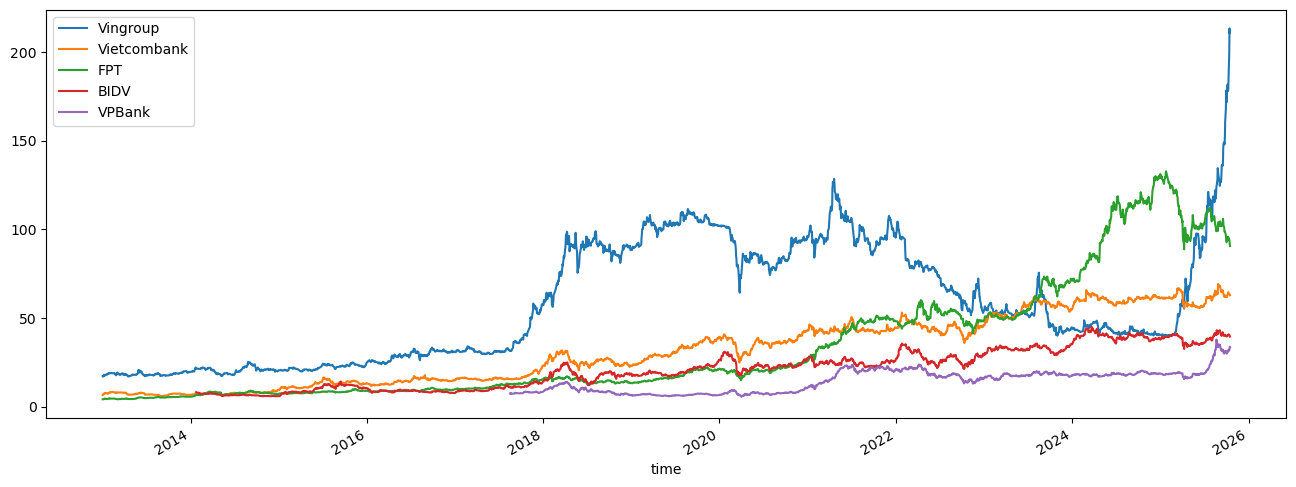

In [7]:
ax = df_VICmean.plot(x='time', y= 'Mean', label='Vingroup', figsize=(16,6))
ax = df_VCBmean.plot(ax=ax, x= 'time', y= 'Mean',label='Vietcombank')
ax = df_FPTmean.plot(ax=ax, x= 'time', y= 'Mean',label='FPT')
ax = df_BIDmean.plot(ax=ax, x= 'time', y= 'Mean',label='BIDV')
df_VPBmean.plot(ax=ax, x= 'time', y= 'Mean',label='VPBank')

Ta đánh giá sự thay đổi của các mã của các công ty Facebook, Alibaba và Zoom trên theo ngày (tính theo %) (Apple và Cloudfare ta không xét do thời gian quá lớn hoặc quá nhỏ)

In [8]:
df_VICmean['Change']= (df_VICmean['close']/df_VICmean['close'].shift(1)) - 1 
df_VCBmean['Change']= (df_VCBmean['close']/df_VCBmean['close'].shift(1)) - 1 
df_BIDmean['Change']= (df_BIDmean['close']/df_BIDmean['close'].shift(1)) - 1 
df_FPTmean['Change']= (df_FPTmean['close']/df_FPTmean['close'].shift(1)) - 1 
df_VPBmean['Change']= (df_VPBmean['close']/df_VPBmean['close'].shift(1)) - 1 



Sau đó, ta vẽ biểu đồ cột thể hiện sự thay đổi của các mã theo ngày

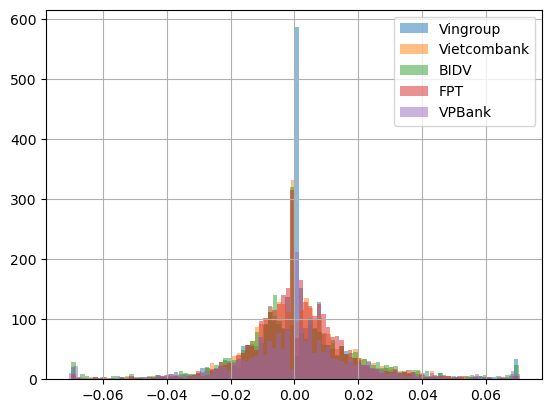

In [9]:
df_VICmean['Change'].hist(bins=100, label='Vingroup',alpha=0.5)
df_VCBmean['Change'].hist(bins=100, label='Vietcombank', alpha=0.5)
df_BIDmean['Change'].hist(bins=100, label='BIDV', alpha=0.5)
df_FPTmean['Change'].hist(bins=100, label='FPT', alpha=0.5)
df_VPBmean['Change'].hist(bins=100, label='VPBank', alpha=0.5)

plt.legend()

Biểu đồ trên thể hiện sự biến động của từng mã. Số lượng gần 0 càng nhiều chứng tỏ là mã càng biến động ít và ngược lại.

Ta vẽ biểu đồ đường để miêu tả rõ hơn điều đó

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


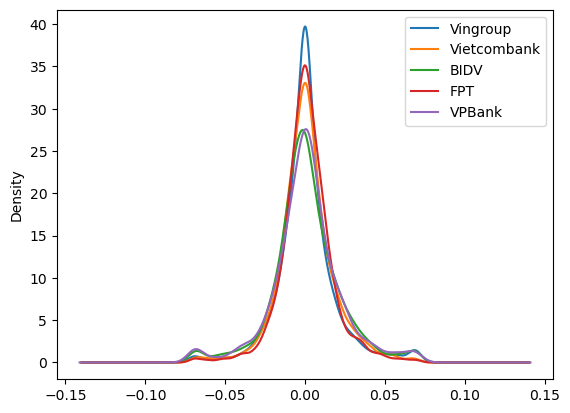

In [10]:
df_VICmean['Change'].plot(kind= 'kde', label = 'Vingroup')
df_VCBmean['Change'].plot(kind= 'kde', label = 'Vietcombank')
df_BIDmean['Change'].plot(kind= 'kde', label = 'BIDV')
df_FPTmean['Change'].plot(kind= 'kde', label = 'FPT')
df_VPBmean['Change'].plot(kind= 'kde', label = 'VPBank')

plt.legend()

Từ biểu đồ trên, ta thấy sự biến động của các mã đều gần giống với phân phối chuẩn có giá trị trung bình là 0.

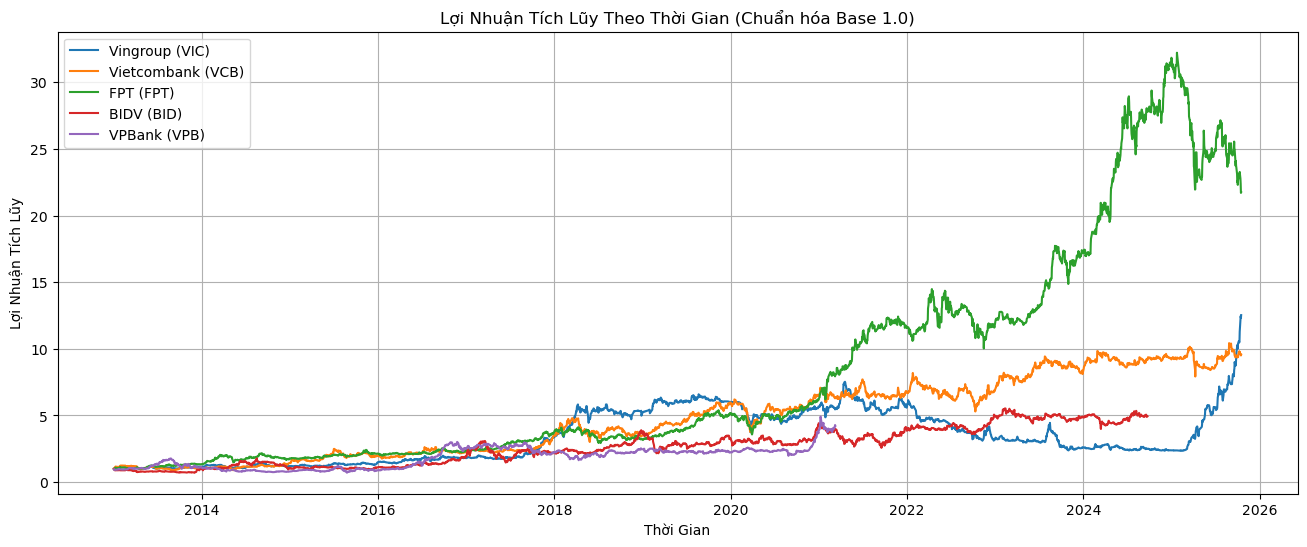

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử các DataFrame df_...mean đã có cột 'Change'

# Hàm tính lợi nhuận tích lũy
def calculate_cumulative_returns(df):
    # (1 + Change).cumprod()
    return (1 + df['Change']).cumprod()

# Tạo DataFrame chung cho biểu đồ
cumulative_df = pd.DataFrame({
    'Time': df_VICmean['time'],
    'VIC': calculate_cumulative_returns(df_VICmean),
    'VCB': calculate_cumulative_returns(df_VCBmean),
    'FPT': calculate_cumulative_returns(df_FPTmean),
    'BID': calculate_cumulative_returns(df_BIDmean),
    'VPB': calculate_cumulative_returns(df_VPBmean)
})

# Vẽ biểu đồ
plt.figure(figsize=(16, 6))
plt.plot(cumulative_df['Time'], cumulative_df['VIC'], label='Vingroup (VIC)')
plt.plot(cumulative_df['Time'], cumulative_df['VCB'], label='Vietcombank (VCB)')
plt.plot(cumulative_df['Time'], cumulative_df['FPT'], label='FPT (FPT)')
plt.plot(cumulative_df['Time'], cumulative_df['BID'], label='BIDV (BID)')
plt.plot(cumulative_df['Time'], cumulative_df['VPB'], label='VPBank (VPB)')

plt.title('Lợi Nhuận Tích Lũy Theo Thời Gian (Chuẩn hóa Base 1.0)')
plt.xlabel('Thời Gian')
plt.ylabel('Lợi Nhuận Tích Lũy')
plt.legend()
plt.grid(True)
plt.savefig('cumulative_returns.png')
# plt.show()


Ma trận Tương quan Lợi nhuận Hàng ngày:
|     |         VIC |         VCB |         FPT |         BID |         VPB |
|:----|------------:|------------:|------------:|------------:|------------:|
| VIC |  1          |  0.29342    |  0.249702   |  0.00164827 | -0.00334963 |
| VCB |  0.29342    |  1          |  0.406149   | -0.00147107 |  0.022833   |
| FPT |  0.249702   |  0.406149   |  1          |  0.00163763 | -0.0144519  |
| BID |  0.00164827 | -0.00147107 |  0.00163763 |  1          |  0.0259612  |
| VPB | -0.00334963 |  0.022833   | -0.0144519  |  0.0259612  |  1          |


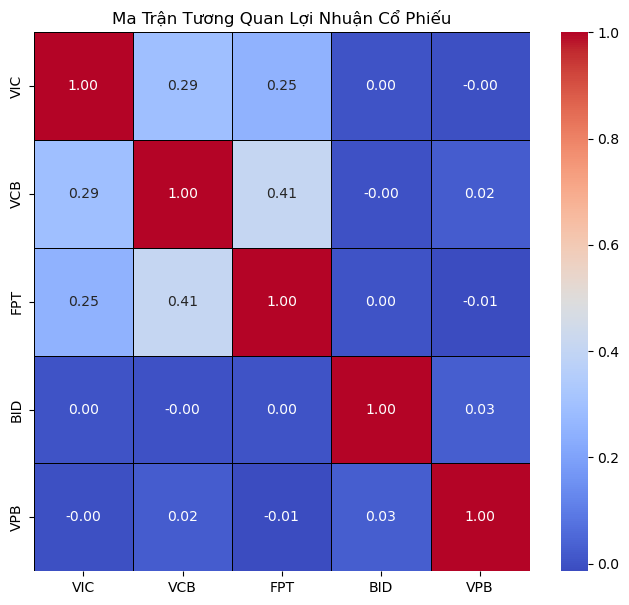

In [39]:
# !pip install tabulate
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




returns_df = pd.DataFrame({
    'VIC': df_VICmean['Change'],
    'VCB': df_VCBmean['Change'],
    'FPT': df_FPTmean['Change'],
    'BID': df_BIDmean['Change'],
    'VPB': df_VPBmean['Change']
})


correlation_matrix = returns_df.corr()
print("\nMa trận Tương quan Lợi nhuận Hàng ngày:")
print(correlation_matrix.to_markdown())


plt.figure(figsize=(8, 7))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, linecolor='black')
plt.title('Ma Trận Tương Quan Lợi Nhuận Cổ Phiếu')
plt.savefig('correlation_heatmap.png')
plt.show()

# Dùng mô hình học máy để dự đoán tình hình chứng khoán

In [36]:
df = spark.read.format("csv")\
.option("header", "true")\
.option("inferSchema", "true")\
.load("hdfs://namenode:9000/user/root/datack_VN/stock_data_CII.csv")
df.show(5)

+---+-------------------+----+----+----+-----+------+
|_c0|               time|open|high| low|close|volume|
+---+-------------------+----+----+----+-----+------+
|  0|2012-01-03 00:00:00|7.16|7.63|7.02| 7.09|167760|
|  1|2012-01-04 00:00:00|7.26|7.26|6.89| 6.92|113790|
|  2|2012-01-05 00:00:00|6.85|7.09|6.85| 6.89|  4950|
|  3|2012-01-06 00:00:00|7.12|7.12|6.62| 6.62| 34040|
|  4|2012-01-09 00:00:00|6.58|6.79|6.58| 6.75| 15850|
+---+-------------------+----+----+----+-----+------+
only showing top 5 rows



In [13]:
from pyspark.sql.functions import expr, col, column
df = df.withColumn("Mean", expr('(high+low)/2'))  #Thêm một cột giá trị mean ( được tính bằng trung bình của low và high)

In [14]:
df.show(5)

+---+-------------------+----+----+----+-----+------+------------------+
|_c0|               time|open|high| low|close|volume|              Mean|
+---+-------------------+----+----+----+-----+------+------------------+
|  0|2012-01-03 00:00:00|7.16|7.63|7.02| 7.09|167760| 7.324999999999999|
|  1|2012-01-04 00:00:00|7.26|7.26|6.89| 6.92|113790| 7.074999999999999|
|  2|2012-01-05 00:00:00|6.85|7.09|6.85| 6.89|  4950|              6.97|
|  3|2012-01-06 00:00:00|7.12|7.12|6.62| 6.62| 34040|              6.87|
|  4|2012-01-09 00:00:00|6.58|6.79|6.58| 6.75| 15850|6.6850000000000005|
+---+-------------------+----+----+----+-----+------+------------------+
only showing top 5 rows



In [15]:
asc_df = df.sort(df.time.asc()) #Sắp xếp các cột theo tứ tự tăng dần của thời gian

In [16]:
asc_df.show(5)

+---+-------------------+----+----+----+-----+------+------------------+
|_c0|               time|open|high| low|close|volume|              Mean|
+---+-------------------+----+----+----+-----+------+------------------+
|  0|2012-01-03 00:00:00|7.16|7.63|7.02| 7.09|167760| 7.324999999999999|
|  1|2012-01-04 00:00:00|7.26|7.26|6.89| 6.92|113790| 7.074999999999999|
|  2|2012-01-05 00:00:00|6.85|7.09|6.85| 6.89|  4950|              6.97|
|  3|2012-01-06 00:00:00|7.12|7.12|6.62| 6.62| 34040|              6.87|
|  4|2012-01-09 00:00:00|6.58|6.79|6.58| 6.75| 15850|6.6850000000000005|
+---+-------------------+----+----+----+-----+------+------------------+
only showing top 5 rows



In [17]:
from pyspark.sql.functions import year
df_test = asc_df.filter(year("time") > 2023) #tách ra tập test là tập gồm thông tin của năm 2020

In [18]:
df_test.show(5)

+----+-------------------+-----+-----+-----+-----+--------+------------------+
| _c0|               time| open| high|  low|close|  volume|              Mean|
+----+-------------------+-----+-----+-----+-----+--------+------------------+
|2996|2024-01-02 00:00:00|13.84|13.96|13.56|13.64| 5962764|13.760000000000002|
|2997|2024-01-03 00:00:00|13.64|14.04|13.52|13.88|10159195|             13.78|
|2998|2024-01-04 00:00:00| 14.0| 14.0|13.72|13.72|10052421|             13.86|
|2999|2024-01-05 00:00:00| 13.8|13.84|13.52|13.56| 8545576|             13.68|
|3000|2024-01-08 00:00:00|13.88|14.47|13.88|14.47|26204153|            14.175|
+----+-------------------+-----+-----+-----+-----+--------+------------------+
only showing top 5 rows



In [19]:
df_train = asc_df.subtract(df_test)   #tách ra tập train
df_train.count()

2996

In [20]:
df_train = df_train.sort(df_train.time.asc())   #sắp xếp lại tập train
df_train.show(5)

+---+-------------------+----+----+----+-----+------+------------------+
|_c0|               time|open|high| low|close|volume|              Mean|
+---+-------------------+----+----+----+-----+------+------------------+
|  0|2012-01-03 00:00:00|7.16|7.63|7.02| 7.09|167760| 7.324999999999999|
|  1|2012-01-04 00:00:00|7.26|7.26|6.89| 6.92|113790| 7.074999999999999|
|  2|2012-01-05 00:00:00|6.85|7.09|6.85| 6.89|  4950|              6.97|
|  3|2012-01-06 00:00:00|7.12|7.12|6.62| 6.62| 34040|              6.87|
|  4|2012-01-09 00:00:00|6.58|6.79|6.58| 6.75| 15850|6.6850000000000005|
+---+-------------------+----+----+----+-----+------+------------------+
only showing top 5 rows



In [21]:
dataset_train = df_train.toPandas()

/usr/local/spark/python/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


In [22]:
# !pip install keras

In [23]:
# !pip install tensorflow

In [24]:
# !pip install --upgrade pip
# !pip install numpy==1.26.4 tensorflow==2.15.0


# Import những thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
from os import path
# from keras.models import Sequential
from tensorflow.keras.models import Sequential
from keras.layers import Dense
# from keras.layers import LSTM
from tensorflow.keras.layers import Dense, LSTM
from keras.layers import Dropout


In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
training_set = dataset_train[['close']].values
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

Tạo dữ liệu train, X = 60 time steps, Y =  1 time step, có nghĩa lấy dữ liệu của 60 ngày trước để dự đoán cho ngày tiếp theo hay có thể hiểu là lấy 60 ngày trước làm đầu vào, và đầu ra của mô hình sẽ là ngày tiếp theo

In [27]:
# Tạo dữ liệu train 
X_train = []
y_train = []
no_of_sample = len(training_set)

for i in range(60, no_of_sample):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [28]:
# # Xây dựng model LSTM
# regressor = Sequential()
# regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# regressor.add(Dropout(0.2))
# regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))
# regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))
# regressor.add(LSTM(units = 50))
# regressor.add(Dropout(0.2))
# regressor.add(Dense(units = 1))
# regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


# ==== MODEL: CNN + BiGRU + Attention ====
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.layers import LayerNormalization, GlobalAveragePooling1D, Multiply, Softmax, Permute
from tensorflow.keras.losses import Huber

timesteps = X_train.shape[1]
features = X_train.shape[2]

inp = Input(shape=(timesteps, features))
x = Conv1D(filters=64, kernel_size=3, padding='causal', activation='relu')(inp)
x = MaxPooling1D(pool_size=2)(x)
x = LayerNormalization()(x)
x = Bidirectional(GRU(100, return_sequences=True))(x)
x = Dropout(0.3)(x)

# Attention
attn_scores = Dense(1, activation='tanh')(x)
attn_scores = Permute((2,1))(attn_scores)
attn_weights = Softmax(axis=-1)(attn_scores)
attn_weights = Permute((2,1))(attn_weights)
weighted = Multiply()([x, attn_weights])
pooled = GlobalAveragePooling1D()(weighted)

dense = Dense(64, activation='relu')(pooled)
dense = Dropout(0.3)(dense)
out = Dense(1)(dense)

regressor = Model(inputs=inp, outputs=out)
regressor.compile(optimizer='adam', loss=Huber(), metrics=['mse'])
regressor.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 60, 1)]              0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 60, 64)               256       ['input_1[0][0]']             
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 30, 64)               0         ['conv1d[0][0]']              
 D)                                                                                               
                                                                                                  
 layer_normalization (Layer  (None, 30, 64)               128       ['max_pooling1d[0][0]']   

In [29]:
# # Nếu tồn tại model thì load lại nếu không thì thực hiện train 
# if path.exists("mymodel.h5"):
#     regressor.load_weights("mymodel.h5")
# else:
#     regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
#     regressor.save("mymodel.h5")

# Nếu tồn tại model thì load lại nếu không thì thực hiện train 
if path.exists("mymodel_update.h5"):
    regressor.load_weights("mymodel_update.h5")
else:
    regressor.fit(X_train, y_train, epochs = 50, batch_size = 64)
    regressor.save("mymodel_update.h5")






Epoch 1/50
46/46 [==============================] - 6s 55ms/step - loss: 0.0087 - mse: 0.0173
Epoch 2/50
46/46 [==============================] - 3s 63ms/step - loss: 0.0025 - mse: 0.0050
Epoch 3/50
46/46 [==============================] - 3s 64ms/step - loss: 0.0016 - mse: 0.0033
Epoch 4/50
46/46 [==============================] - 3s 57ms/step - loss: 0.0013 - mse: 0.0026
Epoch 5/50
46/46 [==============================] - 3s 54ms/step - loss: 0.0011 - mse: 0.0022
Epoch 6/50
46/46 [==============================] - 3s 61ms/step - loss: 9.6662e-04 - mse: 0.0019
Epoch 7/50
46/46 [==============================] - 3s 59ms/step - loss: 9.1525e-04 - mse: 0.0018
Epoch 8/50
46/46 [==============================] - 3s 55ms/step - loss: 8.3048e-04 - mse: 0.0017
Epoch 9/50
46/46 [==============================] - 3s 62ms/step - loss: 7.0379e-04 - mse: 0.0014
Epoch 10/50
46/46 [==============================] - 3s 64ms/step - loss: 7.1128e-04 - mse: 0.0014
Epoch 11/50
46/46 [====================

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
dataset_test = df_test.toPandas()
real_stock_price = dataset_test["close"].values

/usr/local/spark/python/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


In [31]:
# # Tiến hành dự đoán 
# dataset_total = pd.concat((dataset_train['Mean'], dataset_test['Mean']), axis = 0)
# inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
# inputs = inputs.reshape(-1,1)
# inputs = sc.transform(inputs)

# X_test = []
# no_of_sample = len(inputs)

# for i in range(60, no_of_sample):
#     X_test.append(inputs[i-60:i, 0])

# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# predicted_stock_price = regressor.predict(X_test)
# predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# Tiến hành dự đoán

# Ghép dữ liệu train và test theo cột Mean
dataset_total = pd.concat((dataset_train['Mean'], dataset_test['Mean']), axis=0)

inputs = dataset_total.iloc[len(dataset_total) - len(dataset_test) - 60:].values

# Chuẩn hóa dữ liệu giống lúc train
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

# Tạo tập dữ liệu đầu vào X_test
X_test = []
no_of_sample = len(inputs)

for i in range(60, no_of_sample):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Dự đoán
predicted_stock_price = regressor.predict(X_test)

# Chuyển ngược về giá trị gốc
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


14/14 [==============================] - 1s 14ms/step


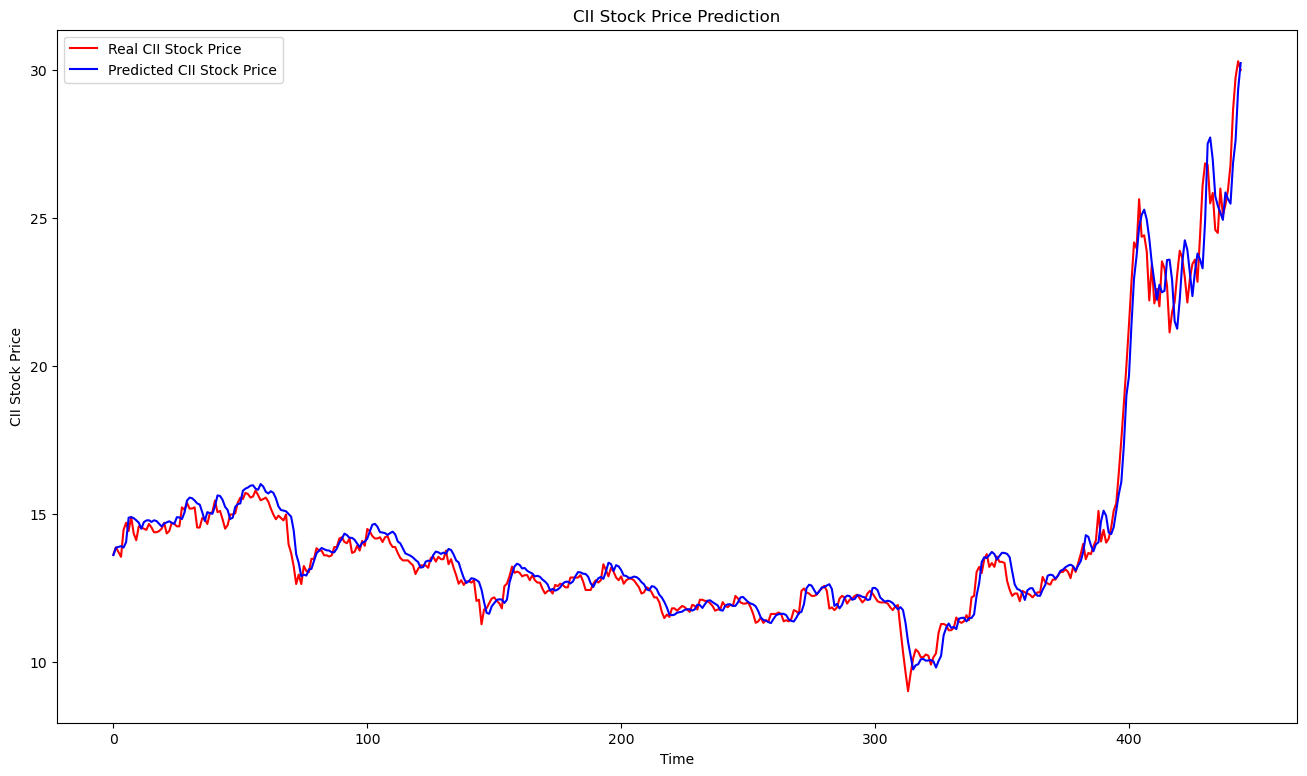

In [44]:
# Ve bieu do gia that va gia du doan
plt.figure(figsize=(16,9))
plt.plot(real_stock_price, color = 'red', label = 'Real CII Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted CII Stock Price')
plt.title('CII Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('CII Stock Price')
plt.legend()
plt.savefig('image4.png')
plt.show()


In [43]:
# spark.stop()

In [34]:
# Image("spark_st.png")